# Predicting HIV Risk and Identifying Key Infection Drivers among Adolescent Girls and Young Women in Kenya (2018–2022)



## Introduction
Human Immunodeficiency Virus (HIV) remains one of the most pressing global health challenges. Despite major advances in prevention and treatment, adolescent girls and young women (AGYW) continue to bear a disproportionate burden of new infections, especially in sub-Saharan Africa. Research shows that adolescent girls and Young women are at least twice as likely to acquire HIV compared to their male counterparts due to a mix of biological, socio-economic, and behavioral risk factors.

The SPARK program (Strengthening Prevention and Awareness for Resilient Communities) was launched to reduce HIV infections among AGYW by addressing the structural drivers of HIV risk, including poverty, gender inequality, and violence. However, evaluating its effectiveness and identifying the most at-risk individuals remains a challenge.

This project leverages data science methodologies to analyze the effectiveness of SPARKS interventions, identify patterns of risk, and evaluate program outcomes. By utilizing data from program implementation, surveys, and HIV incidence tracking, the study aims to provide insights into optimizing resource allocation, improving service delivery, and strengthening impact assessment.

## Business Understanding
The core objective of this project is to support evidence-based decision-making in public health by analyzing SPARK'S program data. The business problem revolves around improving the targeting and effectiveness of interventions by identifying high-risk populations, measuring program reach, and assessing the correlation between intervention layering and HIV prevention outcomes.
This project leverages data science to support public health organizations, policymakers, NGOs, and the program's coordinators by providing data-driven insights to:
- Predict HIV risk among AGYW based on demographics, behavior, and intervention exposure.
- Identify key risk factors contributing to HIV vulnerability.
- Assess the effectiveness of the program's interventions in reducing HIV risk.
- Determine which interventions (biomedical, behavioral, social protection) have the most impact.

By answering these questions, we aim to improve resource allocation, intervention targeting, and HIV prevention strategies, ensuring that support reaches the most vulnerable AGYW effectively.

#### **Objectives:**

This project aims to:
- Develop a predictive model to estimate HIV risk among AGYW.
- Analyze key factors influencing HIV risk through feature importance techniques.
- Determine the most impactful interventions within the DREAMS framework.
- Provide actionable insights to optimize HIV prevention efforts.

## Data Understanding
**1. Dataset Description**

The dataset used in this project contains detailed demographic, behavioral, and intervention-related information on adolescent girls and young women (AGYW) participating in the health program. The data includes key indicators such as:

- Demographic Information – Age, county, household structure, parental status.
- Socioeconomic Status – Household size, food security, income sources.
- Education & Behavior – School attendance, history of sexual activity, condom use.
- HIV Testing & Status – HIV testing history, last test result.
- DREAMS Program Participation – Interventions received (biomedical, behavioral, social protection).
- Exit Status – Whether participants continued or exited the program and the reason for exiting.

This dataset provides a comprehensive view of factors affecting HIV risk among AGYW, allowing for predictive modeling and impact evaluation.

**2. Data Source**

The dataset originates from the SPARK(Strengthening Prevention and Awareness for Resilient Communities) initiative, a global HIV prevention effort targeting adolescent girls and young women.
 
*Why this dataset is relevant:*
- It includes key HIV risk indicators (e.g., sexual activity, education, income).
- It captures intervention history (biomedical, behavioral, social protection).
- It enables predictive modeling to identify at-risk individuals and evaluate intervention effectiveness.

*How we will use this data:*
- To identify patterns & risk factors that contribute to HIV vulnerability.
- To assess the program's interventions and their impact on HIV risk.
- To develop predictive models to help in resource allocation & targeted interventions.

## Data Cleaning

1. Loading Required Libraries & Dataset

In [182]:
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
%matplotlib inline
import summarytools as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

In [183]:
#Ioading the dataset
AGYW_prev_data=pd.read_csv(r'C:\Users\rkeoye\Documents\AUDIT_2024\DATA_SCIENCE\PHASE  5\dreams_raw_dataset.csv')
AGYW_prev_data.head() #display the first 5 rows of the dataset

,date_of_birth,date_of_enrollment,county,head_of_household,head_of_household_other,age_of_household_head,father_alive,mother_alive,are_both_parents_alive,is_one_parent_alive,...,intervention_name,intervention_date,result,bio_medical,social_protection,behavioral,post_gbv_care,other_interventions,exit_age,exit_reason_other
0,9/16/2004,2/22/2020,Nairobi,Mother,NaN,58.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),8/8/2020,Negative,1,1,1,0,0,NaN,NaN
1,8/2/2004,12/18/2019,Nairobi,Father,NaN,43.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,NaN,NaN
2,10/20/2005,3/7/2020,Nairobi,Mother,NaN,41.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,0,0,0,NaN,NaN
3,1/18/2006,3/3/2020,Nairobi,Mother,NaN,45.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0,NaN,NaN
4,3/22/2004,12/18/2019,Nairobi,Father,NaN,42.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,NaN,NaN


In [184]:
AGYW_prev_data.info()
'''
Dataset Summary:
The dataset contains 455,807 rows and 42 columns.
It includes the following data types:
- 8 columns of type Float
- 29 columns of type Object
- 5 columns of type Integer
'''


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455807 entries, 0 to 455806
Data columns (total 42 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   date_of_birth                      455807 non-null  object 
 1   date_of_enrollment                 455806 non-null  object 
 2   county                             446551 non-null  object 
 3   head_of_household                  446192 non-null  object 
 4   head_of_household_other            5960 non-null    object 
 5   age_of_household_head              434789 non-null  float64
 6   father_alive                       442399 non-null  object 
 7   mother_alive                       442820 non-null  object 
 8   are_both_parents_alive             455807 non-null  object 
 9   is_one_parent_alive                455807 non-null  object 
 10  parents_alive_status               390403 non-null  object 
 11  no_of_people_in_household          4486

'\nDataset Summary:\nThe dataset contains 455,807 rows and 42 columns.\nIt includes the following data types:\n- 8 columns of type Float\n- 29 columns of type Object\n- 5 columns of type Integer\n'

In [185]:
# Checking the data types,number of varibles per feature, and memory usage
st.dfSummary(AGYW_prev_data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,date_of_birth[object],1. 1/1/20002. 1/1/20023. 1/1/19984. 1/1/20015. 1/1/19996. 1/1/19967. 1/1/19978. 1/1/19949. 1/1/200310. 1/1/199511. other,"1,011 (0.2%)993 (0.2%)904 (0.2%)883 (0.2%)875 (0.2%)794 (0.2%)756 (0.2%)614 (0.1%)551 (0.1%)509 (0.1%)447,917 (98.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADaElEQVR4nO3cQWoUYRRG0VehiWbSTQhkCbqHLMLFuohehHsIITUwMZNyIIo41lvQnjPK8B9ceDTUl2XbtoHC1d4P4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MlfLsnxcluX93g/h8l3NzIeZebf3Q7h8zigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbmamS8z823vh3D5Fv/FiIozSkZsZKyryFhXkXFGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQMXgh44ySERsZgxcyBi9knFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERkZsZKyryFhXkXFGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i44ySERsZgxcyBi9knFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i44ySERsZ6yoy1lVknFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMs4oGbGRERsZ6yoy1lVknFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLWVWSsq8g4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMs4omWVmbmbmeu+HcLHetm17mZk53N3dfToej7d7v4jLtK7r07Isn7dtezkcj8fbh4eHl9Pp9Lr3w7gsz8/P78/n8+3j4+P1zLwcZmZOp9Pr/f39153fxmW6+fmHHwhkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDjM/PgXZ+yFcnj+7Oqzr+nQ+n2/nt09B4G9Z1/VpZt5mfBbOv/frs3DrKjJ+IJARGxmxkREbGbGRERsZsZERGxmxkfkOCvhuJDOJMoEAAAAASUVORK5CYII="">",0(0.0%)
2,date_of_enrollment[object],1. 12/9/20202. 12/2/20203. 12/3/20204. 8/23/20175. 12/7/20206. 8/28/20177. 12/10/20208. 12/4/20209. 12/15/202010. 8/25/201711. other,"1,795 (0.4%)1,786 (0.4%)1,723 (0.4%)1,712 (0.4%)1,707 (0.4%)1,691 (0.4%)1,683 (0.4%)1,673 (0.4%)1,671 (0.4%)1,634 (0.4%)438,732 (96.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADfUlEQVR4nO3cMWobUQBF0S8jTNyMEAItRovwYrMI7UYITREbN0oRpwhRAgH7DijnVCHVFJfR5PNfVtfrdUDhYekH4P8hNjJiIyM2MmIjIzYyYiMjNjJiI7MaYzyNMcb1en1Z+Fm4c+vdbvc8xhir1eqr4PhMD9M0badp2o4xHpd+GO6bbzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI7Oe5/n8/ue3RZ+Eu2eDQGblv8yi4s1GxrqKjHUVGUcfZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IuBZOxuCFjDcbGYMXMgYvZBx9kBEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXgh41o4GYMXMr7ZyPgZJWNdRca6ioxvNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZFwLJ2NdRcabjYzBCxmDFzKOPsiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kHEtnIzBCxlvNjIGL2QMXsg4+iAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZGwQyFhXkfFmI2NdRca6ioyjDzJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZFwLJ2PwQsabjYzBCxmDFzKOPsiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kHEtnIzBCxnfbGT8jJKxriJjXUXGNxsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxnrKjKuhZOxriLjzUbG4IWMwQsZRx9kxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsi4Fk7G4IXMzzebK+F8pLdbv5Tr3W73/L5BgA8xz/P51oBqPU3T9nA4vGw2m9elHo77cblcvhyPx+3pdHocY/wa2xhjbDab1/1+/22Rp+MePd36S+dsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZNZj/LgWsvSDcB/+1tJ6nufz8Xjcjj9cC4F/9T6i+m1A5Vo4n+HmtXCDFzL+gUBGbGTERkZsZMRGRmxkxEZGbGTERuY7CLkQJ3942gEAAAAASUVORK5CYII="">",1(0.0%)
3,county[object],1. Nairobi2. Kisumu3. Homabay4. Migori5. Siaya6. Mombasa7. Kiambu8. nan,"100,411 (22.0%)82,909 (18.2%)79,954 (17.5%)69,846 (15.3%)60,411 (13.3%)31,890 (7.0%)21,130 (4.6%)9,256 (2.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAC4CAYAAAD0WZ4UAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADS0lEQVR4nO3dQWrbaACG4d/FlOnGJgRyGB9iDjuH8G1CiBaT0o1nMQ1kpk2b1NIrqJ5nl5W1ePmNhL54d7lcBhQ+rH0BbIfYyIiNjNjIiI2M2Mjsxhifxhg

In [186]:
#checking for missing values
missing_values=AGYW_prev_data.isna().sum().sort_values(ascending=False)
total_rows=AGYW_prev_data.shape[0]
missing_values_percentage=((missing_values/total_rows)*100).round(1)
missing_values_percentage

head_of_household_other              98.7
dreams_program_other                 98.6
exit_reason_other                    94.4
dreams_program                       89.8
used_condom_with_last_partner        53.4
age_of_last_partner                  53.4
age_at_first_sexual_encounter        50.4
has_sexual_partner                   50.4
current_school_level                 44.1
no_of_days_missed_food_in_4wks       43.7
current_income_source                28.4
exit_reason                          15.3
exit_age                             15.1
parents_alive_status                 14.3
age_of_household_head                 4.6
father_alive                          2.9
mother_alive                          2.8
head_of_household                     2.1
county                                2.0
no_of_children                        1.7
ever_had_sex                          1.7
no_of_males                           1.7
no_of_adults                          1.6
no_of_females                     

**Observations**

- Some columns have over 90% missing values, such as age_of_last_partner, used_condom_with_last_partner, and dreams_program_other.
- Important features like county (2% missing) and currently_in_school (0.9% missing) have moderate missingness.
- Household-related columns (head_of_household, no_of_people_in_household) also contain gaps.
- Columns related to sexual history (ever_had_sex, age_at_first_sexual_encounter) have high missing values averaging 50%.

In [187]:
#columns with 80% null values above
above_threshold = missing_values_percentage[missing_values_percentage > 80.0]
#print(missing_values_percentage)
print("\nColumns with missing values above 80% threshold:")
print(above_threshold)
# Drop the columns with more than 80% missing values
AGYW_prev_data= AGYW_prev_data.drop(columns=above_threshold.index)


Columns with missing values above 80% threshold:
head_of_household_other    98.7
dreams_program_other       98.6
exit_reason_other          94.4
dreams_program             89.8
dtype: float64


In [188]:
# Filling missing values for categorical and numerical columns
numerical_cols = AGYW_prev_data.select_dtypes(include=np.number).columns
print(f'numerical columns: {numerical_cols}')
categorical_cols = AGYW_prev_data.select_dtypes(include='object').columns
print(f'categorical columns:  {categorical_cols}')

# Fill missing values
for col in AGYW_prev_data.columns:
    if col in numerical_cols:
        AGYW_prev_data[col].fillna(AGYW_prev_data[col].median(), inplace=True)  # Fill numerical columns missing values with median
    elif col in categorical_cols:
        most_frequent = AGYW_prev_data[col].mode()[0] if not AGYW_prev_data[col].mode().empty else "Unknown"
        AGYW_prev_data[col].fillna(most_frequent, inplace=True)  # Fill categorical colums missing values with mode or "Unknown"

numerical columns: Index(['age_of_household_head', 'no_of_people_in_household', 'no_of_females',
       'no_of_males', 'no_of_adults', 'no_of_children',
       'age_at_first_sexual_encounter', 'bio_medical', 'social_protection',
       'behavioral', 'post_gbv_care', 'other_interventions', 'exit_age'],
      dtype='object')
categorical columns:  Index(['date_of_birth', 'date_of_enrollment', 'county', 'head_of_household',
       'father_alive', 'mother_alive', 'are_both_parents_alive',
       'is_one_parent_alive', 'parents_alive_status',
       'ever_missed_full_day_food_in_4wks', 'no_of_days_missed_food_in_4wks',
       'currently_in_school', 'current_school_level', 'current_income_source',
       'ever_tested_for_hiv', 'last_test_result', 'ever_had_sex',
       'has_sexual_partner', 'age_of_last_partner',
       'used_condom_with_last_partner', 'exit_status', 'exit_reason',
       'intervention_name', 'intervention_date', 'result'],
      dtype='object')


In [189]:
#confirm null vlaues again
AGYW_prev_data.isnull().sum()

date_of_birth                        0
date_of_enrollment                   0
county                               0
head_of_household                    0
age_of_household_head                0
father_alive                         0
mother_alive                         0
are_both_parents_alive               0
is_one_parent_alive                  0
parents_alive_status                 0
no_of_people_in_household            0
no_of_females                        0
no_of_males                          0
no_of_adults                         0
no_of_children                       0
ever_missed_full_day_food_in_4wks    0
no_of_days_missed_food_in_4wks       0
currently_in_school                  0
current_school_level                 0
current_income_source                0
ever_tested_for_hiv                  0
last_test_result                     0
ever_had_sex                         0
age_at_first_sexual_encounter        0
has_sexual_partner                   0
age_of_last_partner      

In [190]:
# drop the duplicate rows
duplicates=AGYW_prev_data.duplicated().sum()
AGYW_prev_data = AGYW_prev_data.drop_duplicates()
print(f"We have dropped {duplicates} duplicate rows.")

We have dropped 105 duplicate rows.


In [191]:
#drop columns that we may not need for our analysis
columns_to_drop=['intervention_name','head_of_household_other','ever_tested_for_hiv','post_gbv_care','exit_reason_other']


In [192]:
# converting date columns to dateline 
date_cols= ['date_of_birth', 'date_of_enrollment','intervention_date']
for col in date_cols:
    AGYW_prev_data[col] = pd.to_datetime(AGYW_prev_data[col])

In [193]:
 #Stripping leading and trailing whitespace for categorial columns
obj_cols = AGYW_prev_data.select_dtypes(include=['object']).columns
for col in obj_cols:
    AGYW_prev_data[col] = AGYW_prev_data[col].str.strip()

In [194]:
#Standardize categorical variables that have binary responses (e.g., Yes/No)
binary_cols = ['father_alive', 'mother_alive', 'ever_missed_full_day_food_in_4wks', 'currently_in_school', 'ever_tested_for_hiv', 'ever_had_sex', 'has_sexual_partner', 
               'used_condom_with_last_partner']
for col in binary_cols:
    if col in AGYW_prev_data.columns:
        # Convert to lower case for consistency
        AGYW_prev_data[col] = AGYW_prev_data[col].str.lower()
        # Replace common variations with standardized 'yes' or 'no'
        AGYW_prev_data[col] = AGYW_prev_data[col].replace({'yes': 'yes', 'no': 'no', 'y': 'yes', 'n': 'no'})

# print the first few rows 
AGYW_prev_data[['father_alive', 'mother_alive', 'ever_missed_full_day_food_in_4wks', 'currently_in_school', 'ever_tested_for_hiv', 'ever_had_sex', 'has_sexual_partner', 
               'used_condom_with_last_partner']].head()

,father_alive,mother_alive,ever_missed_full_day_food_in_4wks,currently_in_school,ever_tested_for_hiv,ever_had_sex,has_sexual_partner,used_condom_with_last_partner
0,yes,yes,no,yes,yes,no,yes,sometimes
1,yes,yes,no,yes,yes,no,yes,sometimes
2,no,yes,yes,yes,yes,no,yes,sometimes
3,no,yes,no,yes,yes,no,yes,sometimes
4,yes,yes,no,yes,yes,no,yes,sometimes


In [195]:
# Creating a new column 'year' by extracting the year from 'date_of_enrollment'
AGYW_prev_data['year'] = AGYW_prev_data['date_of_enrollment'].dt.year

# Displaying the first few rows to verify the new column
AGYW_prev_data[['date_of_enrollment', 'year']].head()

,date_of_enrollment,year
0,2020-02-22,2020
1,2019-12-18,2019
2,2020-03-07,2020
3,2020-03-03,2020
4,2019-12-18,2019


In [196]:
# Calculate age at enrollment using the birth and enrollment dates
def calculate_age(row):
    dob = row['date_of_birth']
    doe = row['date_of_enrollment']
    # Return NaN if either date is missing
    if pd.isnull(dob) or pd.isnull(doe):
        return np.nan
    # Compute the basic difference in years
    age = doe.year - dob.year
    # Adjust if the birthday has not yet occurred in the enrollment year
    if (doe.month, doe.day) < (dob.month, dob.day):
        age -= 1
    return age

# Apply the function to create a new column 'age_at_enrollment'
AGYW_prev_data['age_at_enrollment'] = AGYW_prev_data.apply(calculate_age, axis=1)

# Calculate the mean age (ignoring missing values)
mean_age = AGYW_prev_data['age_at_enrollment'].mean()

# Display the first few rows to verify the result
AGYW_prev_data[['date_of_birth', 'date_of_enrollment', 'age_at_enrollment']].head()

,date_of_birth,date_of_enrollment,age_at_enrollment
0,2004-09-16,2020-02-22,15
1,2004-08-02,2019-12-18,15
2,2005-10-20,2020-03-07,14
3,2006-01-18,2020-03-03,14
4,2004-03-22,2019-12-18,15


In [197]:
# Creating age groups by defining bins and labels for the age groups
bins = [5, 10, 15, 20, 25, float('inf')]
labels = ["5-9", "10-14", "15-19", "20-24", "Over 24"]

# Create the new column 'age_group' based on 'age_at_enrollment'
AGYW_prev_data['age_group'] = pd.cut(AGYW_prev_data['age_at_enrollment'], bins=bins, right=False, labels=labels)

# Display the distribution of the new age groups
age_group_distribution = AGYW_prev_data['age_group'].value_counts().sort_index()
age_group_distribution

age_group
5-9          2470
10-14       63702
15-19      228880
20-24      160564
Over 24        86
Name: count, dtype: int64

In [198]:
#Numerical columns
numerical_cols= AGYW_prev_data.select_dtypes(include=np.number).columns

#Checking for outliers using IQR (Interquartile Range) method
outliers_iqr = {}

for col in numerical_cols:
    Q1 = AGYW_prev_data[col].quantile(0.25)
    Q3 = AGYW_prev_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = AGYW_prev_data[(AGYW_prev_data[col] < lower_bound) | (AGYW_prev_data[col] > upper_bound)]
    outliers_iqr[col] = outliers.shape[0]  # Count of outliers for each column

#Checking for outliers using Z-score method
from scipy.stats import zscore

outliers_zscore = {}

for col in numerical_cols:
    # Calculate the Z-scores for each value in the column
    z_scores = zscore(AGYW_prev_data[col].dropna())
    
    # Identify outliers (Z-score > 3 or < -3)
    outliers = np.where(np.abs(z_scores) > 3)[0]
    outliers_zscore[col] = len(outliers)  # Count of outliers for each column

#Combine results
outliers_summary = pd.DataFrame({
    'Outliers (IQR)': outliers_iqr,
    'Outliers (Z-score)': outliers_zscore
})

print(outliers_summary)

                               Outliers (IQR)  Outliers (Z-score)
age_of_household_head                    7294                   9
no_of_people_in_household                8965                 551
no_of_females                            6494                 673
no_of_males                              6145                1214
no_of_adults                            30995                6042
no_of_children                          14993                 410
age_at_first_sexual_encounter          189880                  49
bio_medical                              4275                4275
social_protection                        5422                5422
behavioral                              53642                   0
post_gbv_care                           88129                   0
other_interventions                     27852               27852
exit_age                                 1228                1228
year                                        0                   0
age_at_enr

In [199]:
# Define the list of columns to handle (excluding 'age_at_first_sexual_encounter')
columns_to_handle = [
    'age_of_household_head', 
    'no_of_people_in_household', 
    'no_of_females', 
    'no_of_males', 
    'no_of_adults', 
    'no_of_children', 
    'bio_medical', 
    'social_protection', 
    'behavioral', 
    'post_gbv_care', 
    'other_interventions', 
    'exit_age',
    'age_at_first_sexual_encounter'
]

# Handling outliers by replacing them with the median value
def handle_outliers_with_median(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Using boolean masking to replace outliers with the median
        median_value = df[col].median()
        df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median_value

    return df

# Handle the outliers by replacing them with median values
AGYW_prev_data = handle_outliers_with_median(AGYW_prev_data, columns_to_handle)

# Optional: Check the cleaned DataFrame
AGYW_prev_data[columns_to_handle].describe().T

,count,mean,std,min,25%,50%,75%,max
age_of_household_head,455702.0,42.022552,11.619095,10.0,34.0,42.0,50.0,74.0
no_of_people_in_household,455702.0,5.600485,2.104036,0.0,4.0,6.0,7.0,11.0
no_of_females,455702.0,3.220376,1.374343,0.0,2.0,3.0,4.0,7.0
no_of_males,455702.0,2.346380,1.355621,0.0,1.0,2.0,3.0,6.0
no_of_adults,455702.0,2.230688,0.790926,1.0,2.0,2.0,3.0,4.0
no_of_children,455702.0,3.052679,1.718698,0.0,2.0,3.0,4.0,7.0
bio_medical,455702.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
social_protection,455702.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
behavioral,455702.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
post_gbv_care,455702.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


## Exploratory Data Analysis (EDA)
##### 2.1 Visualizing the Distribution of the Target Variable 'result'

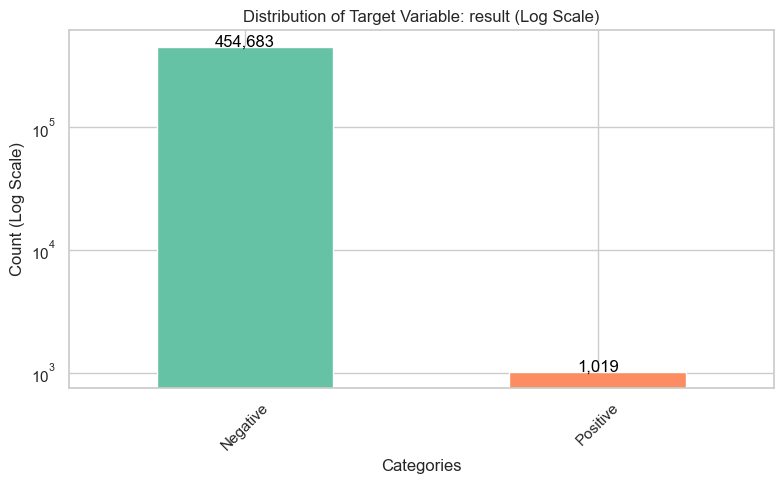

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the 'result' column from the DataFrame
result = AGYW_prev_data['result']

# Generate a color palette from Seaborn's 'Set2' palette
palette = sns.color_palette('Set2', n_colors=len(result.value_counts()))

# Visualize the distribution with a logarithmic y-axis
plt.figure(figsize=(8, 5))
ax = result.value_counts().plot(kind='bar', color=palette)  # Use the Seaborn palette

# Use logarithmic scale for better visibility of both categories
plt.yscale('log')

# Title and labels
plt.title('Distribution of Target Variable: result (Log Scale)')
plt.xlabel('Categories')
plt.ylabel('Count (Log Scale)')
plt.xticks(rotation=45)

# Annotate the bars with the count values, formatted with commas
for index, value in enumerate(result.value_counts()):
    plt.text(index, value + 2, f'{value:,}', ha='center', color='black')  # Format with commas

plt.tight_layout()
plt.show()



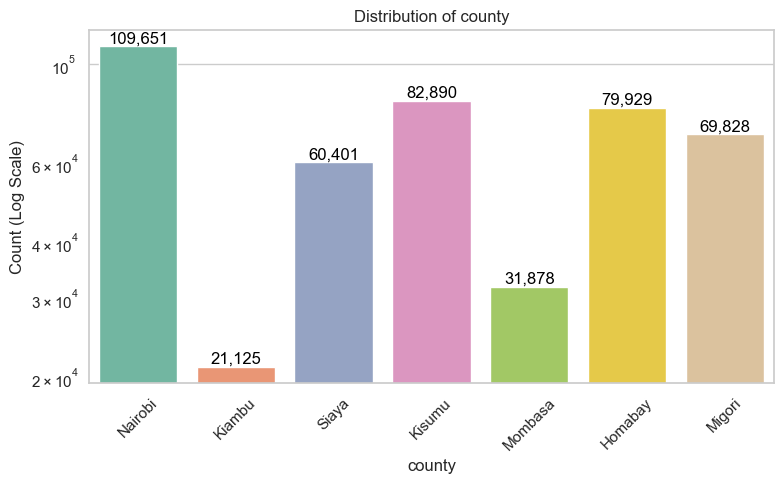

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def visualize_univariate_analysis(df, cat_variable):
    """
    Visualizes the distribution of a categorical variable.
    Annotates the bars with the count values for clarity, using logarithmic scale and comma formatting.
    
    Parameters:
    df (DataFrame): The DataFrame containing the data.
    cat_variable (str): The categorical variable to analyze.
    
    Returns:
    None: Displays the plot.
    """
    # Strip any leading/trailing spaces in column names
    df.columns = df.columns.str.strip()
    
    # Check if the categorical variable exists in the DataFrame
    if cat_variable not in df.columns:
        print(f"Warning: {cat_variable} does not exist in the DataFrame.")
        return

    # Visualize the distribution of the categorical variable
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(x=cat_variable, data=df, palette='Set2')

    # Set logarithmic scale for the y-axis
    ax.set_yscale('log')

    # Add the count at the end of each bar with comma formatting
    for p in ax.patches:
        height = p.get_height()
        # Annotating the bar with count formatted with commas
        ax.text(p.get_x() + p.get_width() / 2, height + 2,
                f'{int(height):,}', ha='center', va='bottom', fontsize=12, color='black')  # Formatting text

    # Customize the plot
    plt.title(f'Distribution of {cat_variable}')
    plt.xlabel(cat_variable)
    plt.ylabel('Count (Log Scale)')
    
    # Rotate x-axis ticks by 45 degrees
    plt.xticks(rotation=45)

    # Display the plot
    plt.tight_layout()
    plt.show()

# Call the function with AGYW_prev_data and 'county' as the categorical variable
visualize_univariate_analysis(AGYW_prev_data, 'county')

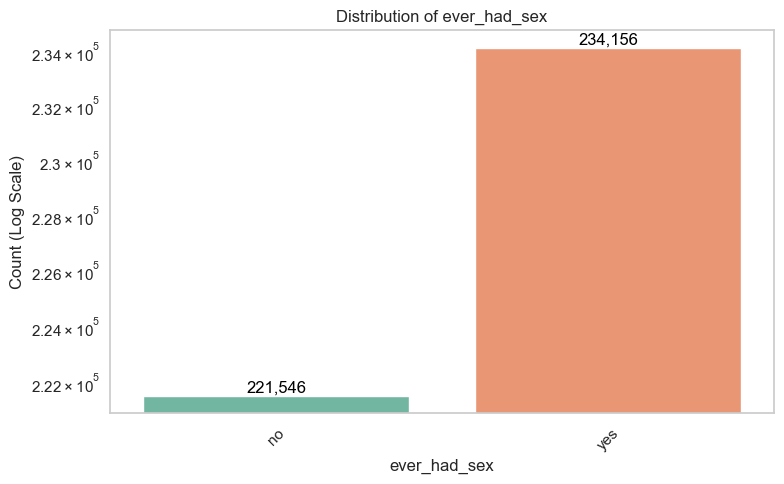

In [203]:
# Call the function with AGYW_prev_data and 'county' as the categorical variable
visualize_univariate_analysis(AGYW_prev_data, 'ever_had_sex')

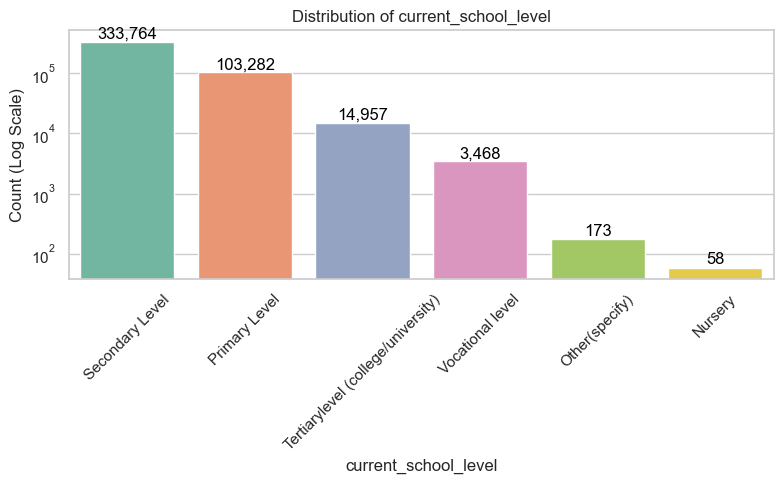

In [204]:
# Call the function with AGYW_prev_data and 'county' as the categorical variable
visualize_univariate_analysis(AGYW_prev_data, 'current_school_level')

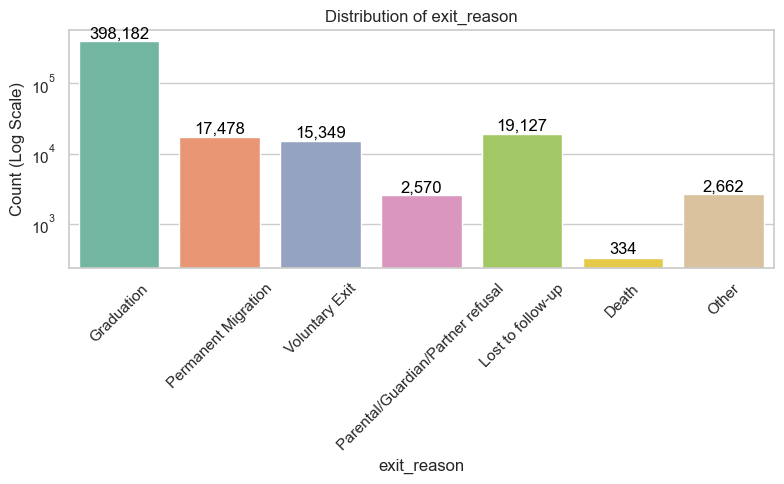

In [205]:
# Call the function with AGYW_prev_data and 'county' as the categorical variable
visualize_univariate_analysis(AGYW_prev_data, 'exit_reason')

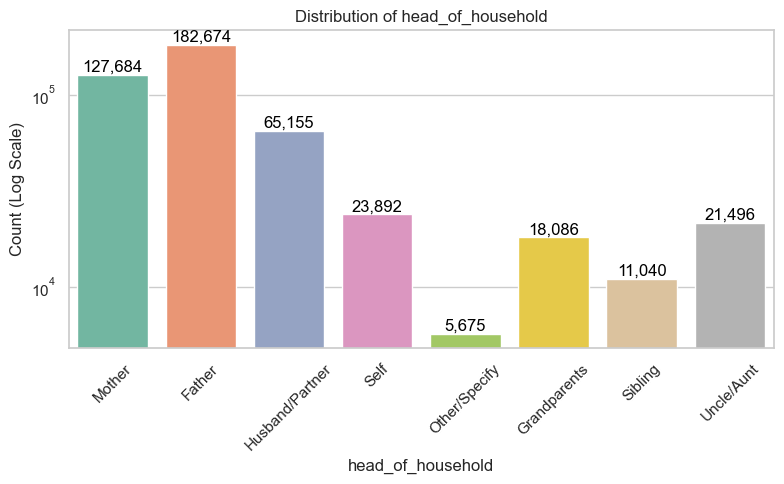

In [206]:
# Call the function with AGYW_prev_data and 'county' as the categorical variable
visualize_univariate_analysis(AGYW_prev_data, 'head_of_household')

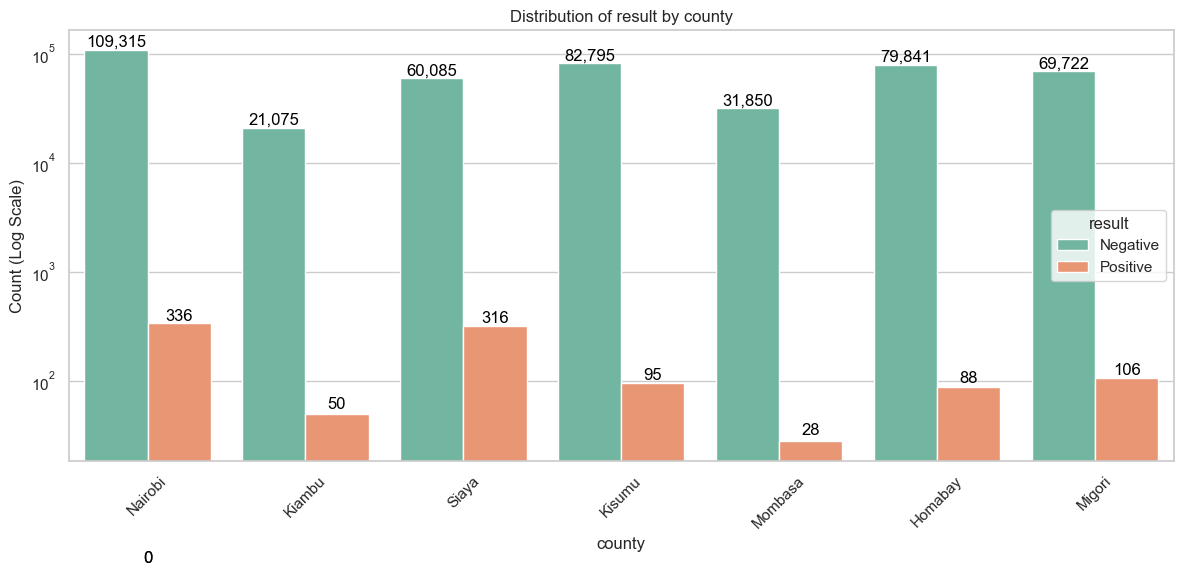

In [207]:
def visualize_result_by_category(df, cat_variable, target_col='result'):
    """
    Visualizes the distribution of the 'result' column against a categorical variable.
    Annotates the bars with the count values for clarity, using logarithmic scale and comma formatting.
    
    Parameters:
    df (DataFrame): The DataFrame containing the data.
    cat_variable (str): The categorical variable to compare 'result' against.
    target_col (str): The column representing the target variable, default is 'result'.
    
    Returns:
    None: Displays the plot.
    """
    # Strip any leading/trailing spaces in column names
    df.columns = df.columns.str.strip()
    
    # Check if the target column exists in the DataFrame
    if target_col not in df.columns:
        print(f"Warning: {target_col} does not exist in the DataFrame.")
        return

    # Visualize the distribution of 'result' by the categorical variable
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x=cat_variable, hue=target_col, data=df, palette='Set2')

    # Set logarithmic scale for the y-axis
    ax.set_yscale('log')

    # Add the count at the end of each bar with comma formatting
    for p in ax.patches:
        height = p.get_height()
        # Annotating the bar with count formatted with commas
        ax.text(p.get_x() + p.get_width() / 2, height + 2,
                f'{int(height):,}', ha='center', va='bottom', fontsize=12, color='black')  # Formatting text

    # Customize the plot
    plt.title(f'Distribution of {target_col} by {cat_variable}')
    plt.xlabel(cat_variable)
    plt.ylabel('Count (Log Scale)')
    
    # Rotate x-axis ticks by 45 degrees
    plt.xticks(rotation=45)

    # Display the plot
    plt.tight_layout()
    plt.show()

# Call the function with AGYW_prev_data and 'county' as the categorical variable
visualize_result_by_category(AGYW_prev_data, 'county')


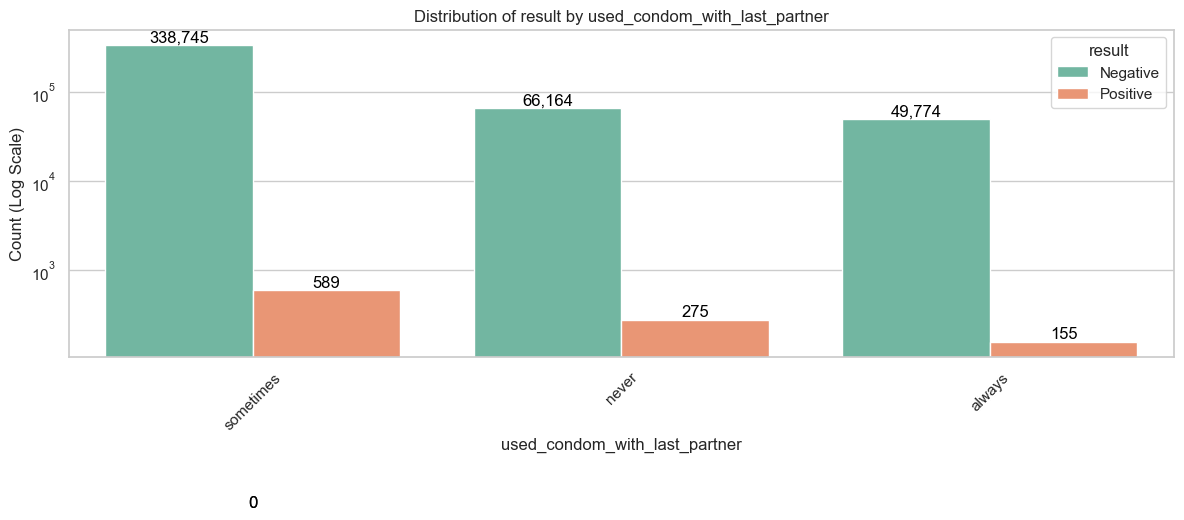

In [208]:
visualize_result_by_category(AGYW_prev_data, 'used_condom_with_last_partner')

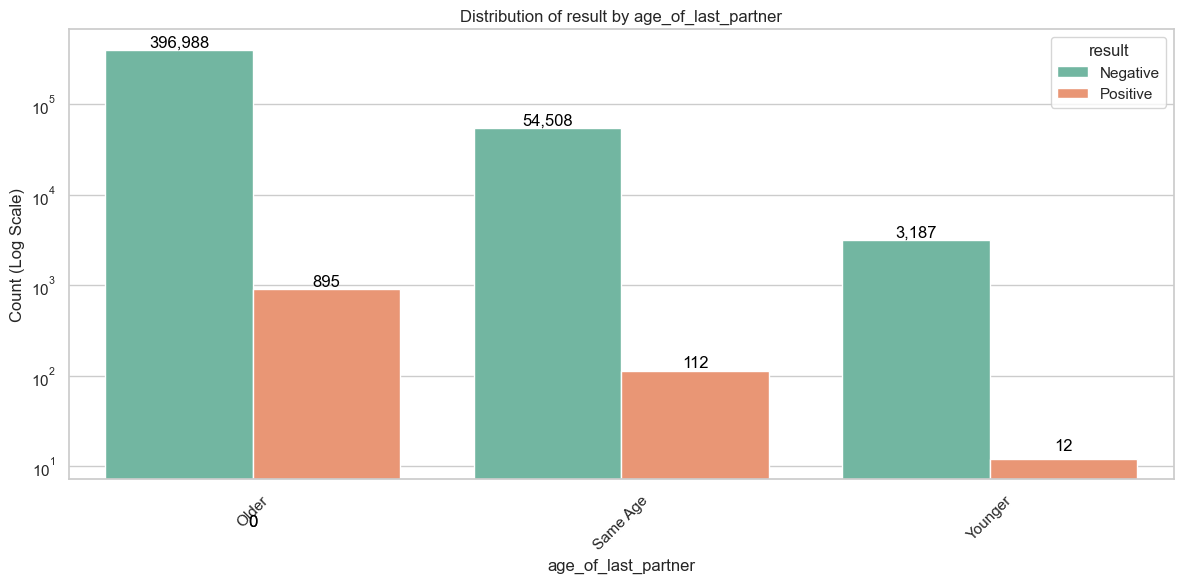

In [209]:
visualize_result_by_category(AGYW_prev_data, 'age_of_last_partner')

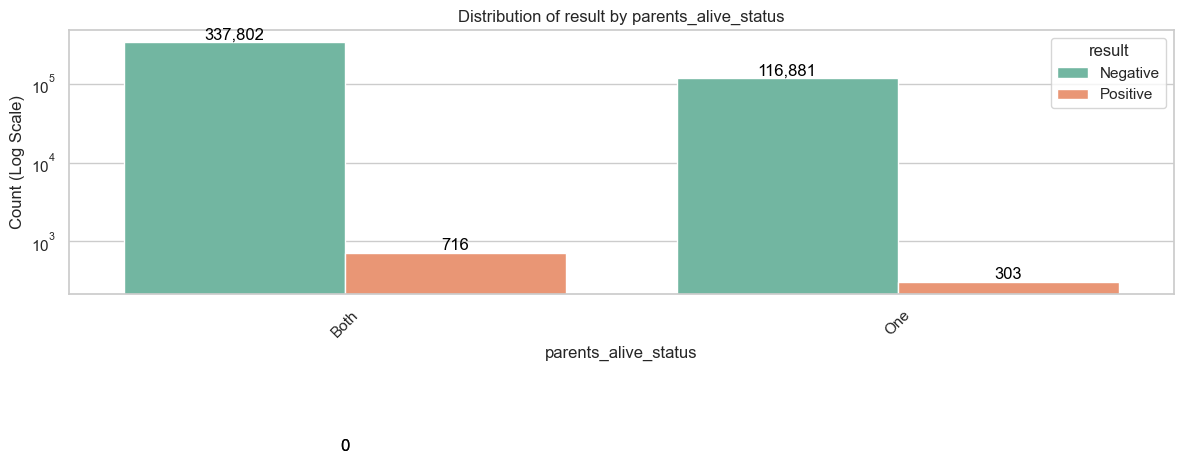

In [210]:
visualize_result_by_category(AGYW_prev_data, 'parents_alive_status')

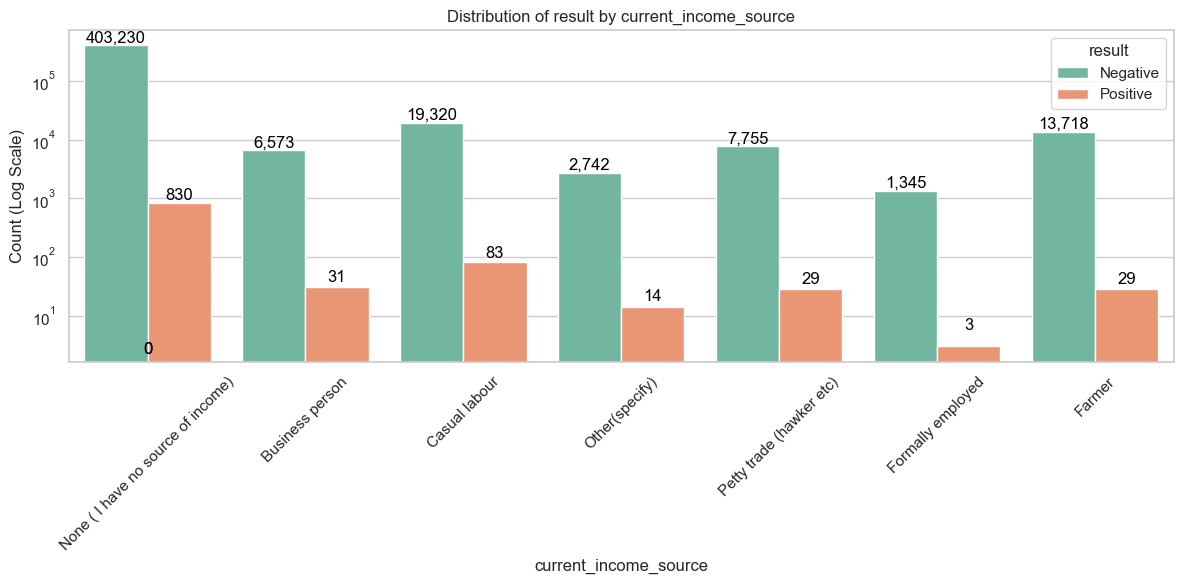

In [211]:
visualize_result_by_category(AGYW_prev_data, 'current_income_source')